# Building A Simple Version of Gradient Descent From Scratch:
- http://krspiced.pythonanywhere.com/chapters/project_bicycles/gradient_descent/README.html

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

#fix the size of every image produced
plt.rcParams['figure.figsize'] = (14,8)

### Step 0 - Let's start with some data.

In [34]:
slope = 2
intercept = 1.5
x = np.random.normal(size = 100)
y = intercept + slope*x + np.random.normal(size=len(x))

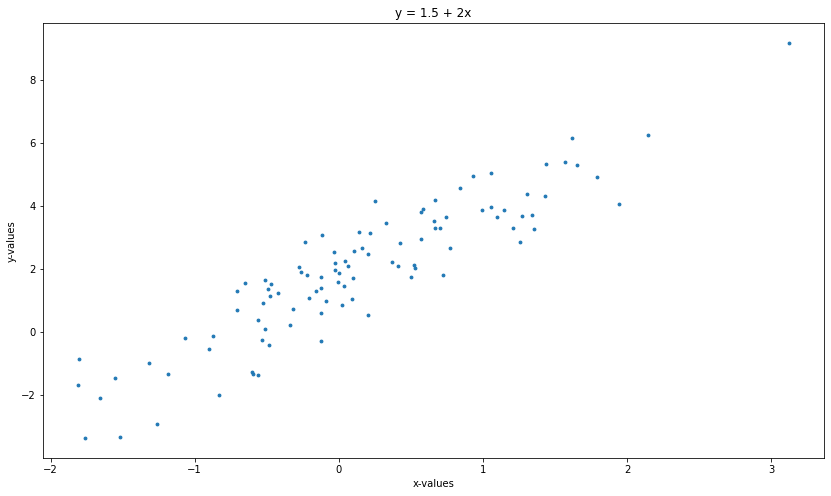

In [35]:
plt.scatter(x, y, s=8.0)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('y = 1.5 + 2x')
plt.show()

### Step 1 - Write a function which plots a line

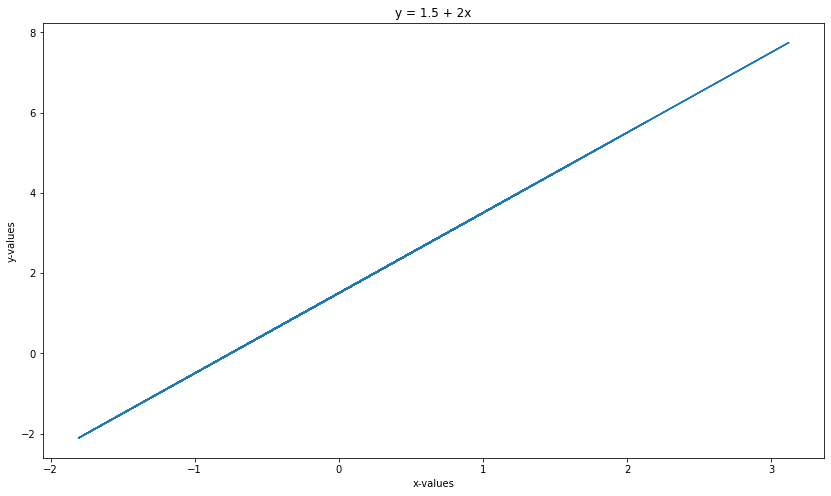

In [39]:
def make_line(x, intercept, slope):
    """draw a line, given intercept, slope and x data"""
    ypred = intercept + slope*x
    return ypred
ypred = make_line(x,1.5,2)
#print(x.shape, ypred.shape)

plt.plot(x, ypred)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

### And try it on the (intentionally) bad prediction

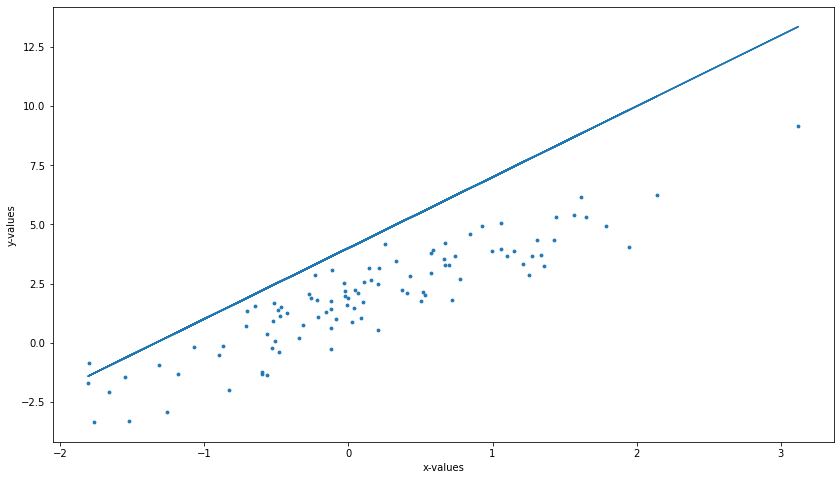

In [48]:
ypred = make_line(x,4,3)
#print(x.shape, ypred.shape)
plt.scatter(x, y, s=8.0)
plt.plot(x, ypred)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

### Step 2 - Loss Function

In [51]:
def mse(ytrue, ypred):
    """calculate mean squared error"""
    error=np.mean((ypred - ytrue)**2)
    return error

#### Check that MSE is working well

In [52]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

So at this point, we have the ability to tell our computer how "good" or "bad" a prediction (i.e. combination of parameters) is.
But this is not enough; we would also like to tell it how we should improve:

* Calculating the gradient tells us the direction we need to move in to improve!!
* We actually need to move in the direction of negative gradient, i.e. downhill

---

### Step 3 - Calculate Gradient
**There are two ways to calculate gradient, intuitive and mathematical**

#### Intuitive - rise over run

![](hill.png)

#### Mathematical

Outside the scope at this stage, take a look [here](https://www.derivative-calculator.net/)

* Today we'll use the intuitive version

---

#### Part 1 - what is the direction of negative gradient?
$\triangle \omega = -\eta \triangledown loss(\omega)$

#### Part 2 - Update params to move in that direction
$\omega_{new} = \omega_{old} + \triangle\omega$

In [91]:
def calc_gradient(x, ytrue, slope, intercept):
    dw = 0.0001
    ypred = intercept + slope*x
    
    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using w0 and w1_change
    ypred_slope = intercept + slope_change*x
    deriv_slope = (np.mean((ypred_slope - ytrue)**2)-np.mean((ypred - ytrue)**2)) / dw
    
    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using w0_change and w1
    ypred_intercept = intercept_change + slope*x
    deriv_intercept = (np.mean((ypred_intercept - ytrue)**2)-np.mean((ypred - ytrue)**2))/dw
    return [deriv_slope, deriv_intercept]# return both derivations as a list

In [92]:
ytrue= 1.5+ 2*x + np.random.normal(size=len(x))
calc_gradient(x, ytrue, 4 ,3)

[4.071451218639055, 3.3988830378905988]

---

### Step 4 - Gradient Descent Implementation

In [ ]:
SLOPE = -1.0 # arbitrary starting value
INTERCEPT = 5.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500

Repeat the following steps `MAX_ITER` times.
In each iteration of the loop:

      1. Calculate the gradient of the loss function
         with respect to each model parameter.
      2. If the gradient becomes really close to zero,
         break out of the loop.
      3. For each model parameter,
         - calculate the updated parameter value
           using the formula from above.
         - overwrite the value with its updated value.
      4. Print all variables to check if they
         are converging to their expected values.

---

## BONUS - create a gif of the GD optimization

## When is Gradient Descent applied?